# 211 Data Project

Background: 
        The program: 2-1-1 is an easy to remember telephone number that connects individuals call 2-1-1 for help with food, housing, employment, health care, counseling and more. Along with the website, 2-1-1 connects millions of people across the nation each year with services. 

Key questions: 
    1. What types of people request certain services?
    2. What is any given person most likely to call about? By location?
    3. How have these trends varied by time?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
%load_ext sql
from seaborn import plt

In [2]:
#Caller needs table#
import pandas as pd
dfNeeds = pd.read_csv('C:\Users\iswearingen\Documents\RawData_Needs (1).txt', '\t')

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (11,15,16,17,18,19,20,21,22,23,24,25,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
#dropping columns with identifying info or little to no data#
dfNeeds= dfNeeds.drop(['Level2Code',
       'Level2Name', 'Level3Code', 'Level3Name', 'Level4Code',
       'Level4Name', 'Level5Code', 'Level5Name', 'PhoneWorkerFirstName', 'PhoneWorkerLastName', 'FromRefer'], axis=1)
dfNeeds.head()

,DateOfCall,CallReportNum,ReportVersionNum,ResourceAgencyNum,AgencyNamePublic,TaxonomyCode,TaxonomyName,CountryName,StateProvince,CountyName,...,AreaCode,PrefixCode,NeedWasUnmet,ReasonIfUnmetOrPartial,Level1Code,Level1Name,PhoneWorkerNum,AIRSNeedCategory,Needid,PrimaryNeeds
0,2/28/2015 23:51:00,24467694,51184,23208282,The Warming Center Program,TH-2600.1580-140,Cold Weather Shelters/Warming Centers,United States,CA,Santa Cruz,...,831,295,0,NaN,T,Organizational/Community/International Services,61936,Disaster Services,3871936,1
1,2/28/2015 22:54:00,24467416,51184,10614517,San Francisco Department of Housing and Urban ...,TB-3000.1400,Community Housing Development Organizations,United States,CA,Solano,...,707,653,0,NaN,T,Organizational/Community/International Services,61936,Other Government/Economic Services,3871907,2
2,2/28/2015 14:15:00,24462653,51184,10608455,Hamiliton Family Emergency Center,BH-1800.8500 * YK-2000,Homeless Shelter * Families,United States,CA,San Francisco,...,909,726,0,NaN,B,Basic Needs,65853,Housing,3871239,1
3,2/28/2015 14:15:00,24462653,51184,10614241,Compass Family Center,BH-1800.8500 * YK-2000,Homeless Shelter * Families,United States,CA,San Francisco,...,909,726,0,NaN,B,Basic Needs,65853,Housing,3871239,1
4,2/28/2015 14:15:00,24462653,51184,10607398,SVDP SF - Multiservice Center South,BH-1800.8500,Homeless Shelter,United States,CA,San Francisco,...,909,726,0,NaN,B,Basic Needs,65853,Housing,3871249,2


In [4]:
#want to see what columns are in here#
dfNeeds.columns.values

array(['DateOfCall', 'CallReportNum', 'ReportVersionNum',
       'ResourceAgencyNum', 'AgencyNamePublic', 'TaxonomyCode',
       'TaxonomyName', 'CountryName', 'StateProvince', 'CountyName',
       'CityName', 'PostalCode', 'AreaCode', 'PrefixCode', 'NeedWasUnmet',
       'ReasonIfUnmetOrPartial', 'Level1Code', 'Level1Name',
       'PhoneWorkerNum', 'AIRSNeedCategory', 'Needid', 'PrimaryNeeds'], dtype=object)

In [5]:
dfNeeds['Level1Name_2'] = ''

In [6]:
#recode taxonomy level 1 values#
def get_code_t(val):
    taxonomy_codes = {}
    taxonomy_codes['B'] = 'Basic Needs'
    taxonomy_codes['T'] = 'Organizational/Community/International Services'
    taxonomy_codes['D'] = 'Consumer Services'    
    taxonomy_codes['H'] = 'Education'
    taxonomy_codes['F'] = 'Criminal Justice and Legal Services'
    taxonomy_codes['J'] = 'Environmental and Public Health/Safety' 
    taxonomy_codes['L'] = 'Health Care'
    taxonomy_codes['N'] = 'Income Support and Employment'
    taxonomy_codes['P'] = 'Individual and Family Life'  
    taxonomy_codes['R'] = 'Mental Health and Substance Abuse' 
    taxonomy_codes['Y'] = 'Target Population'
    val_0 = str(val)[0]
    return taxonomy_codes.get(val_0, 'Misc')

dfNeeds['Level1Name_2'] = dfNeeds.TaxonomyCode.map(get_code_t)

In [7]:
dfNeeds['Level2Name_2'] = ''

In [8]:
#recode taxonomy level 2 values#
def get_code_t(val):
    taxonomy_codes = {}
    taxonomy_codes['BD'] = 'Food'
    taxonomy_codes['BH'] = 'Housing/Shelter'
    taxonomy_codes['BM'] = 'Material Goods'    
    taxonomy_codes['BT'] = 'Transportation'
    taxonomy_codes['BV'] = 'Utilities'
    val_0 = str(val)[0:2]
    return taxonomy_codes.get(val_0, 'Misc')

dfNeeds['Level2Name_2'] = dfNeeds.TaxonomyCode.map(get_code_t)

In [9]:
#Count numbers in each of the Level 1 categories
dfNeeds.Level1Name_2.value_counts()

Basic Needs                                        261544
Organizational/Community/International Services     96074
Misc                                                52445
Income Support and Employment                       48363
Consumer Services                                   45344
Criminal Justice and Legal Services                 41930
Health Care                                         30868
Mental Health and Substance Abuse                   25427
Individual and Family Life                          23412
Education                                            3448
Environmental and Public Health/Safety               1527
Target Population                                     184
dtype: int64

In [10]:
#Count numbers in each of the Level 2 categories
dfNeeds.Level2Name_2.value_counts()

Misc               369027
Housing/Shelter    139941
Food                76272
Utilities           26608
Material Goods      10308
Transportation       8410
dtype: int64

In [11]:
#Create a dataframe to select just basic needs as a service#
df_BasicNeeds = dfNeeds[dfNeeds.Level1Name_2 == 'Basic Needs']

In [12]:
#lets see the unique values in my new column#
dfNeeds.Level1Name_2.unique()

array(['Organizational/Community/International Services', 'Basic Needs',
       'Income Support and Employment',
       'Criminal Justice and Legal Services',
       'Mental Health and Substance Abuse', 'Consumer Services',
       'Individual and Family Life', 'Education', 'Health Care',
       'Environmental and Public Health/Safety', 'Target Population',
       'Misc'], dtype=object)

In [127]:
#Caller needs table#
import pandas as pd
dfCalls = pd.read_csv('C:\Users\iswearingen\Documents\RawData.txt', '\t')

In [128]:
#dropping columns with identifying info or little to no data#
dfCalls= dfCalls.drop(['PhoneNumberFull', 'PhoneExtension', 'ThirdPartyName',
       'ThirdPartyOrganization', 'ThirdPartyPhoneNumber', 'SQ_caller_agree_FU',
       'ThirdPartyAddress', 'ThirdPartyCity', 'ThirdPartyCounty', 'Call_Related_to_0to5',
       'ThirdPartyStateProvince', 'ThridPartyPostalCode', 'CensusReportingArea',
       'TextField8', 'TextField9', 'TextField10', 'CensusTrack', 'CensusDivision',
       'EnteredByWorkerNum', 'EnteredByName', 'EnteredOn', 'Supervisor',
       'Reviewed', 'FeedbackStatus', 'PhoneWorkerName', 'FeedbackFromPhoneWorkerNum',
       'FeedbackFromPhoneWorkerName', 'FUO_attempted_to_rcev_svcs',
       'UFQ_CETF_Referrals', 'FUQ_Date_1st_Attempt',
       'FUQ_Date_2nd_Attempt', 'FUQ_Specialist_Name', 'SQ_FollowUp_date','CD_Call_Status', 'CD_Caller',
       'CD_Received_Via', 'CD_Referred_By', 'CD_Contact_Markers', 'Dem_Age', 'Dem_Current_Housing', 'Dem_Family_Status', 'Dem_Gender',
       'Dem_Health_Insurance', 'Dem_Language', 'Dem_Primary_Income', 'Dem_Secondary_Income', 'DI_Disaster_Info_Requested',
       'DI_Language_Of_Call', 'DI_Type_of_disaster', 'FU_211_Service_Met' ], axis=1)
dfCalls.head()

ValueError: labels ['PhoneWorkerNum'] not contained in axis

In [15]:
dfCalls.describe()

,CallReportNumber,LinkedToCallReportNum,CallLength,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,Call_Related_to_0to5,SQ_caller_agree_FU
count,397739.00000,1858.000000,397739.000000,340032.000000,0,0,0,0,0
mean,5294551.46964,-0.388590,5.276287,92843.247456,NaN,NaN,NaN,NaN,NaN
std,8201032.80307,0.921659,8.258556,11819.599121,NaN,NaN,NaN,NaN,NaN
min,6774.00000,-1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,106349.50000,-1.000000,2.000000,94110.000000,NaN,NaN,NaN,NaN,NaN
50%,206103.00000,-1.000000,3.000000,94403.000000,NaN,NaN,NaN,NaN,NaN
75%,13062195.50000,1.000000,6.000000,94591.000000,NaN,NaN,NaN,NaN,NaN
max,24467694.00000,1.000000,1387.000000,99701.000000,NaN,NaN,NaN,NaN,NaN


In [16]:
dfCalls.columns.values

array(['CallReportNumber', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDatAndTimeStart', 'CallDateAndTimeEnd', 'CallLength',
       'WasRealCall', 'WasHangUp', 'WasSexCall', 'WasWrongNumber',
       'CountyName', 'StateProvince', 'CountryName', 'PostalCode',
       'CensusDivision', 'CensusTrack', 'CensusReportingArea', 'Narrative',
       'ReferalsMade', 'CI_First_Time_Calling',
       'CI_Incoming_Transfer_Source', 'CI_Language_of_Call',
       'CI_Tele_Interpreter', 'CI_Who_Referrals_For',
       'CT_Indicate_Call_Type', 'CT_Hopeless', 'CT_911', 'CT_Intervention',
       'CT_No_IR', 'CETF_no_interest_hear_about_211', 'Comp_fu_story',
       'Comp_incC_story', 'Dem_Age_Of_Person_Need', 'Dem_Ethnicity',
       'Dem_Person_in_Need_Gender', 'Dem_Primary_Source_of_Income',
       'Reason_no_internet_at_home', 'Reason_not_use_internet',
       'How_Often_use_internet', 'FU_Was_DB_Provided', 'FU_Polite',
       'FU_Additional_Referrals_Given', 'FU_Recommend_211',
       'FU_Servi

In [17]:
#Join tables together#
df_merged = pd.merge(dfCalls, dfNeeds, left_on='CallReportNumber', right_on='CallReportNum', how='left')
df_merged.head(5)

,CallReportNumber,ReportVersion,LinkedToCallReportNum,CallDatAndTimeStart,CallDateAndTimeEnd,CallLength,WasRealCall,WasHangUp,WasSexCall,WasWrongNumber,...,NeedWasUnmet,ReasonIfUnmetOrPartial,Level1Code,Level1Name,PhoneWorkerNum,AIRSNeedCategory,Needid,PrimaryNeeds,Level1Name_2,Level2Name_2
0,16191542,211 Bay Area/Santa Cruz/San Benito Call,NaN,10/29/2013 21:23:00,10/29/2013 21:26:00,3,Yes,No,No,No,...,0,NaN,N,Income Support and Employment,33065,Food/Meals,1684148,1,Income Support and Employment,Misc
1,16191482,211 Bay Area/Santa Cruz/San Benito Call,NaN,10/29/2013 21:11:00,10/29/2013 21:15:00,4,Yes,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16191353,211 Bay Area/Santa Cruz/San Benito Call,NaN,10/29/2013 20:50:00,10/29/2013 20:58:00,8,Yes,No,No,No,...,0,NaN,P,Individual and Family Life,33077,"Arts, Culture and Recreation",1684142,2,Individual and Family Life,Misc
3,16191353,211 Bay Area/Santa Cruz/San Benito Call,NaN,10/29/2013 20:50:00,10/29/2013 20:58:00,8,Yes,No,No,No,...,0,NaN,L,Health Care,33077,Health Care,1684135,1,Health Care,Misc
4,11914377,211 Bay Area/Santa Cruz Call,NaN,1/31/2013 19:52:00,1/31/2013 19:52:00,0,Yes,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_merged.describe()

,CallReportNumber,LinkedToCallReportNum,CallLength,PostalCode_x,CensusDivision,CensusTrack,CensusReportingArea,Call_Related_to_0to5,SQ_caller_agree_FU,CallReportNum,ReportVersionNum,ResourceAgencyNum,AreaCode,PrefixCode,NeedWasUnmet,PhoneWorkerNum,Needid,PrimaryNeeds
count,666038.00000,2378.000000,666038.000000,590372.000000,0,0,0,0,0,630556.000000,630556.000000,197293.000000,103320.000000,103324.000000,202287.000000,202284.000000,202287.000000,630556.000000
mean,6401152.51413,-0.460892,7.926886,93492.365974,NaN,NaN,NaN,NaN,NaN,5787977.959540,51184.062778,10970274.726224,610.160453,557.528541,-0.036661,43945.392033,2116775.254411,1.239313
std,8682345.90500,0.887643,9.808710,9139.893234,NaN,NaN,NaN,NaN,NaN,8470955.378347,2.057464,2092963.481429,175.055530,212.744525,0.187928,8794.908048,892681.150401,0.426664
min,6774.00000,-1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,6774.000000,51184.000000,3897924.000000,0.000000,0.000000,-1.000000,32043.000000,747510.000000,1.000000
25%,119970.25000,-1.000000,3.000000,94110.000000,NaN,NaN,NaN,NaN,NaN,114043.750000,51184.000000,10606470.000000,415.000000,374.000000,0.000000,37419.000000,1342047.000000,1.000000
50%,228991.50000,-1.000000,5.000000,94303.000000,NaN,NaN,NaN,NaN,NaN,218091.500000,51184.000000,10609051.000000,650.000000,557.000000,0.000000,43081.000000,2027230.000000,1.000000
75%,15272567.00000,1.000000,10.000000,94590.000000,NaN,NaN,NaN,NaN,NaN,13940818.000000,51184.000000,10613052.000000,707.000000,722.000000,0.000000,51989.000000,2840664.500000,1.000000
max,24467694.00000,1.000000,1387.000000,99701.000000,NaN,NaN,NaN,NaN,NaN,24467694.000000,51394.000000,24323213.000000,989.000000,999.000000,0.000000,65854.000000,3871936.000000,2.000000


In [20]:
df_merged_Level2 = pd.DataFrame(df_merged['Level2Name_2'])
np.unique(df_merged['Level2Name_2'])

C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:197: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([nan, 'Food', 'Housing/Shelter', 'Material Goods', 'Misc',
       'Transportation', 'Utilities'], dtype=object)

In [21]:
df_merged_Level1 =pd.DataFrame( df_merged['Level1Name_2'])
np.unique(df_merged['Level1Name_2'])

array([nan, 'Basic Needs', 'Consumer Services',
       'Criminal Justice and Legal Services', 'Education',
       'Environmental and Public Health/Safety', 'Health Care',
       'Income Support and Employment', 'Individual and Family Life',
       'Mental Health and Substance Abuse', 'Misc',
       'Organizational/Community/International Services',
       'Target Population'], dtype=object)

In [22]:
df_merged_Level1['RESULT'] = 0
df_merged_Level1['RESULT'] = df_merged_Level1.groupby(['Level1Name_2']).transform('count')
df_merged_Level1['SINDEX'] = df_merged_Level1['RESULT']
df_merged_Level1.sort(columns='SINDEX', ascending=False, inplace=True )

In [23]:
df_merged_Level2['RESULT1'] = 0
df_merged_Level2['RESULT1'] = df_merged_Level2.groupby(['Level2Name_2']).transform('count')
df_merged_Level2['SINDEX1'] = df_merged_Level2['RESULT1']
df_merged_Level2.sort(columns='SINDEX1', ascending=False, inplace=True )

In [24]:
df_merged_Level1.set_index

<bound method DataFrame.set_index of        Level1Name_2  RESULT  SINDEX
333019  Basic Needs  261543  261543
369427  Basic Needs  261543  261543
369451  Basic Needs  261543  261543
369445  Basic Needs  261543  261543
369443  Basic Needs  261543  261543
369441  Basic Needs  261543  261543
369440  Basic Needs  261543  261543
369439  Basic Needs  261543  261543
369438  Basic Needs  261543  261543
369434  Basic Needs  261543  261543
369433  Basic Needs  261543  261543
369426  Basic Needs  261543  261543
369269  Basic Needs  261543  261543
369391  Basic Needs  261543  261543
369389  Basic Needs  261543  261543
369388  Basic Needs  261543  261543
369387  Basic Needs  261543  261543
369385  Basic Needs  261543  261543
369384  Basic Needs  261543  261543
369383  Basic Needs  261543  261543
369382  Basic Needs  261543  261543
369378  Basic Needs  261543  261543
369452  Basic Needs  261543  261543
369457  Basic Needs  261543  261543
369458  Basic Needs  261543  261543
369459  Basic Needs  261543

In [25]:
df_merged_Level1_nodups = df_merged_Level1.drop_duplicates(cols=['Level1Name_2','RESULT','SINDEX'], take_last=True)

C:\Anaconda\lib\site-packages\pandas\util\decorators.py:81: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead
  warnings.warn(msg, FutureWarning)


In [26]:
df_merged_Level2_nodups = df_merged_Level2.drop_duplicates(cols=['Level2Name_2','RESULT1','SINDEX1'], take_last=True)

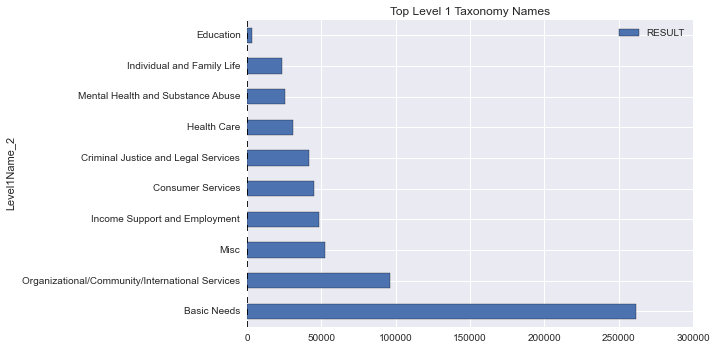

In [27]:
#plot chart of top ten caller needs#
df_merged_for_barchart = df_merged_Level1_nodups.sort(columns='RESULT',ascending=False).head(10)
df_merged_for_barchart.drop(['SINDEX'],axis=1, inplace=True)
df_merged_for_barchart.plot('Level1Name_2', kind='barh', title= 'Top Level 1 Taxonomy Names')

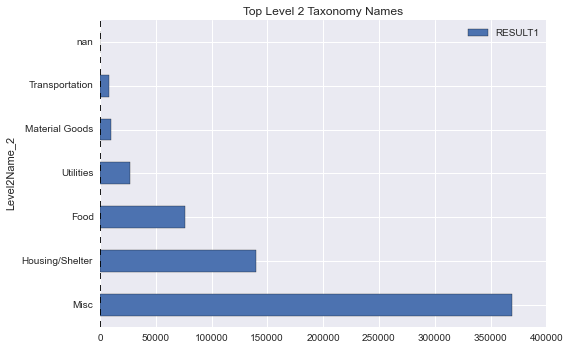

In [28]:
#plot chart of top ten caller needs#
df_merged_for_barchart = df_merged_Level2_nodups.sort(columns='RESULT1',ascending=False).head(10)
df_merged_for_barchart.drop(['SINDEX1'],axis=1, inplace=True)
df_merged.groupby(['Dem_Ethnicity', 'Level1Name_2'])
df_merged_for_barchart.plot('Level2Name_2', kind='barh', title= 'Top Level 2 Taxonomy Names')

In [233]:
df3= df_merged.groupby(['Dem_Ethnicity', 'Level1Name_2']).Level1Name_2.count()
return df3.head(n)

SyntaxError: 'return' outside function (<ipython-input-233-71da7a945c3b>, line 2)

In [30]:
df_merged.Dem_Ethnicity.unique()

array(['Caucasian ', 'African American/Black ', nan, 'Decline to answer',
       'Hispanic / Latino ', 'Multi-Ethnic ', 'Other', 'Asian  ',
       'Native American ', 'Unknown', 'Indian',
       'Pacific Islander / Native Hawaiian '], dtype=object)

In [31]:
from __future__ import division
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression as LR

In [35]:
df_merged['row_count'] = 1

In [36]:
#Question: how do I know if this is only ploting secondary needs (and not the primary needs)?
df_secondary_need = df_merged[df_merged.PrimaryNeeds != 1].pivot_table(values='row_count', index='CallReportNumber', columns='Level1Name_2').fillna(0)
df_secondary_need.head()

Level1Name_2,Basic Needs,Consumer Services,Criminal Justice and Legal Services,Education,Environmental and Public Health/Safety,Health Care,Income Support and Employment,Individual and Family Life,Mental Health and Substance Abuse,Misc,Organizational/Community/International Services,Target Population
CallReportNumber,,,,,,,,,,,,
6783,1,0,0,0,0,0,0,0,0,0,0,0
6786,0,0,1,0,0,0,0,0,0,0,0,0
6793,1,0,0,0,0,0,0,0,0,0,0,0
6802,0,0,1,0,0,0,0,0,0,0,1,0
6806,0,0,1,0,0,0,0,0,0,0,1,0


In [37]:
df_merged.iloc[0:1, :]

,CallReportNumber,ReportVersion,LinkedToCallReportNum,CallDatAndTimeStart,CallDateAndTimeEnd,CallLength,WasRealCall,WasHangUp,WasSexCall,WasWrongNumber,...,ReasonIfUnmetOrPartial,Level1Code,Level1Name,PhoneWorkerNum,AIRSNeedCategory,Needid,PrimaryNeeds,Level1Name_2,Level2Name_2,row_count
0,16191542,211 Bay Area/Santa Cruz/San Benito Call,NaN,10/29/2013 21:23:00,10/29/2013 21:26:00,3,Yes,No,No,No,...,NaN,N,Income Support and Employment,33065,Food/Meals,1684148,1,Income Support and Employment,Misc,1


In [38]:
df_primary_need = df_merged[df_merged.PrimaryNeeds == 1].groupby('CallReportNumber').first()
df_primary_need.head()

,ReportVersion,LinkedToCallReportNum,CallDatAndTimeStart,CallDateAndTimeEnd,CallLength,WasRealCall,WasHangUp,WasSexCall,WasWrongNumber,CountyName_x,...,ReasonIfUnmetOrPartial,Level1Code,Level1Name,PhoneWorkerNum,AIRSNeedCategory,Needid,PrimaryNeeds,Level1Name_2,Level2Name_2,row_count
CallReportNumber,,,,,,,,,,,,,,,,,,,,,
6774,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:25:09,6/1/2006 8:25:09,5,Yes,No,No,No,San Mateo,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Organizational/Community/International Services,Misc,1
6775,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:27:17,6/1/2006 8:27:17,2,Yes,No,No,No,Alameda,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Misc,Misc,1
6776,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:33:53,6/1/2006 8:33:53,1,Yes,No,No,No,Solano,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Misc,Misc,1
6777,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:54:30,6/1/2006 8:54:30,1,Yes,No,No,No,Solano,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Misc,Misc,1
6778,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 9:05:10,6/1/2006 9:05:10,4,Yes,No,No,No,San Francisco,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Misc,Misc,1


In [41]:
#define that all variables are X#
#X_Values = pd.get_dummies(df_primary_need[['PostalCode_y', 'CI_Language_of_Call', 'Dem_Age_Of_Person_Need', 'Dem_Ethnicity','Basic_Need_Family_Status', 'Basic_Need_Housing_Status']])

In [306]:
#define that all variables are X# removed zipcode, seems to be causing problems
X_Values = pd.get_dummies(df_primary_need[['CI_Language_of_Call', 'Dem_Age_Of_Person_Need', 'Dem_Ethnicity','Basic_Need_Family_Status', 'Basic_Need_Housing_Status']])

In [ ]:
#define that all variables are X#
#pd.get_dummies(df_primary_need[['PostalCode_y']])#

In [43]:
#define that all variables are X# Selected only a few variables
#X_Values = pd.get_dummies(df_primary_need[['Dem_Ethnicity', 'Dem_Age_Of_Person_Need', 'Basic_Need_Family_Status']])

In [116]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X_Values.values, df_primary_need['Level1Name_2'].values, test_size=0.3, random_state=12)

In [45]:
#import library#
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [46]:
from sklearn.preprocessing import LabelEncoder

In [117]:
y_label = LabelEncoder()
y_train_transformed = y_label.fit_transform(y_train)

In [118]:
y_label.classes_

array(['Basic Needs', 'Consumer Services',
       'Criminal Justice and Legal Services', 'Education',
       'Environmental and Public Health/Safety', 'Health Care',
       'Income Support and Employment', 'Individual and Family Life',
       'Mental Health and Substance Abuse', 'Misc',
       'Organizational/Community/International Services',
       'Target Population'], dtype=object)

In [48]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [49]:
y_test_transformed = y_label.transform(y_test)
y_test_transformed

array([ 2,  0,  2, ..., 10,  0, 10], dtype=int64)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [129]:
#ran regular decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_transformed)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [52]:
#ran score for decision tree
tree_model.score(X_test, y_test_transformed)

0.45766657771479574

In [53]:
#Ran random forest classifier
rftree_model = RandomForestClassifier()
rftree_model.fit(X_train, y_train_transformed)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [54]:
#predictive score for random forest
rftree_model.score(X_test, y_test_transformed)

0.45747333744352325

In [55]:
#Ran gradient booster
gbtree_model = GradientBoostingClassifier()
gbtree_model.fit(X_train, y_train_transformed)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [56]:
#Predictive score for gradient booster
gbtree_model.score(X_test, y_test_transformed)

0.45709605881865784

In [57]:
#fit model
clf_logit = logit.fit(X_train, y_train)

In [58]:
#do prediction
y_pred = clf_logit.predict(X_test)
print y_pred

['Misc' 'Basic Needs' 'Basic Needs' ...,
 'Organizational/Community/International Services' 'Basic Needs'
 'Organizational/Community/International Services']


In [59]:
X_train.shape, X_test.shape

((253569L, 94L), (108673L, 94L))

In [60]:
#calculated prediction score for this model#
clf_logit.score(X_test, y_test)

0.45467595446891135

In [61]:
#creating a visual to see how many times it correctly/incorrectly classifies spam#
from sklearn.metrics import confusion_matrix, classification_report
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11
0,24443,690,391,0,0,7,11,0,15,207,5783,0
1,1637,4167,248,0,0,0,1,0,6,68,2287,0
2,2353,56,1236,0,0,0,2,0,10,122,3977,0
3,178,6,53,0,0,7,1,0,12,5,283,0
4,147,2,8,0,0,1,0,0,3,3,198,0
5,2213,40,140,0,0,20,1,0,30,42,3246,0
6,4454,101,177,0,0,6,2,0,10,108,3162,0
7,1819,41,103,0,0,8,0,0,24,60,1845,0
8,1579,31,117,0,0,4,0,0,31,25,1779,0
9,2064,652,586,0,0,2,0,0,0,464,11255,0


In [65]:
y_train

array(['Misc', 'Consumer Services', 'Criminal Justice and Legal Services',
       ..., 'Misc', 'Basic Needs', 'Basic Needs'], dtype=object)

# Not a very good model, lets bring in the level 2 needs (for basic needs)

In [307]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X_Values.values, df_primary_need['Level2Name_2'].values, test_size=0.3, random_state=12)

In [308]:
y_label = LabelEncoder()
y_train_transformed = y_label.fit_transform(y_train)

In [309]:
y_test_transformed = y_label.transform(y_test)
y_test_transformed

array([3, 1, 3, ..., 3, 1, 3], dtype=int64)

In [310]:
#ran regular decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_transformed)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [311]:
#ran score for decision tree
tree_model.score(X_test, y_test_transformed)

0.73566571273453385

In [133]:
!pip install pydot

    Couldn't import dot_parser, loading of dot files will not be possible.
  Running setup.py install for pydot
    Couldn't import dot_parser, loading of dot files will not be possible.


In [312]:
column_list = list(df_primary_need.columns.values)

In [279]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data, feature_names=column_list)
print dot_data.getvalue()

graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("decision_tree_clf.pdf")

digraph Tree {
0 [label="SQ_Hear_about_211 <= 0.5000\ngini = 0.465946968163\nsamples = 253569", shape="box"] ;
1 [label="SQ_FU_hour <= 0.5000\ngini = 0.432332642856\nsamples = 234182", shape="box"] ;
0 -> 1 ;
2 [label="SQ_have_internet_at_home <= 0.5000\ngini = 0.362708715762\nsamples = 186729", shape="box"] ;
1 -> 2 ;
3 [label="FUQ_result_2ndAtmp_contact <= 0.5000\ngini = 0.319144615063\nsamples = 172443", shape="box"] ;
2 -> 3 ;
4 [label="WasWrongNumber <= 0.5000\ngini = 0.286446031285\nsamples = 163375", shape="box"] ;
3 -> 4 ;
5 [label="SQ_caller_agree_FU <= 0.5000\ngini = 0.226397976584\nsamples = 136754", shape="box"] ;
4 -> 5 ;
6 [label="Level1Name <= 0.5000\ngini = 0.211058377902\nsamples = 133358", shape="box"] ;
5 -> 6 ;
7 [label="FUQ_Child_use_internet <= 0.5000\ngini = 0.209133547845\nsamples = 133125", shape="box"] ;
6 -> 7 ;
8 [label="FUQ_Satisfied <= 0.5000\ngini = 0.204908604661\nsamples = 131329", shape="box"] ;
7 -> 8 ;
9 [label="Enrolled_Calfresh <= 0.5000\ngini = 0.

In [70]:
#fit model
clf_logit = logit.fit(X_train, y_train)

In [71]:
#do prediction
y_pred = clf_logit.predict(X_test)
print y_pred

['Misc' 'Misc' 'Housing/Shelter' ..., 'Misc' 'Housing/Shelter' 'Misc']


In [72]:
#calculated prediction score for this model#
clf_logit.score(X_test, y_test)

0.72576444931123651

In [122]:
y_label.classes_

array(['Food', 'Housing/Shelter', 'Material Goods', 'Misc',
       'Transportation', 'Utilities'], dtype=object)

In [73]:
#creating a visual to see how many times it correctly/incorrectly classifies spam#
from sklearn.metrics import confusion_matrix, classification_report
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5
0,805,1260,0,8006,0,0
1,408,4930,0,10742,0,0
2,12,225,0,899,0,0
3,1101,2889,0,73136,0,0
4,66,89,0,1330,0,0
5,77,690,0,2008,0,0


In [74]:
df_primary_need.Level2Name_2.unique()

array(['Misc', 'Housing/Shelter', 'Food', 'Utilities', 'Material Goods',
       'Transportation'], dtype=object)

# Lets see if month or day have any better luck!

In [76]:
import pandas as pd
import numpy as np
import dateutil as td

In [77]:
def get_month_name(mon):
    mon = int(mon)
    if mon == 1:
        mn = 'JAN'
    elif mon == 2:
        mn = 'FEB'
    elif mon==3:
        mn = 'MAR'
    elif mon==4:
        mn = 'APR'
    elif mon==5:
        mn = 'MAY'
    elif mon==6:
        mn = 'JUN'
    elif mon==7:
        mn = 'JUL'
    elif mon==8:
        mn = 'AUG'
    elif mon==9:
        mn = 'SEP'
    elif mon==10:
        mn = 'OCT'
    elif mon==11:
        mn = 'NOV'
    elif mon==12:
        mn = 'DEC'      
    else:
        mn = 'NA'
    return mn

In [78]:
def time_class(time_string):
    hour = time_string.split(':')
    hour = int(hour[0])
    if ((hour > 20 and hour < 25) or (hour > 0 and hour < 5)) :
        day_period = 'night'
    elif (hour > 4 and hour < 12):
        day_period = 'morning'
    elif (hour > 11 and hour < 17):
        day_period = 'afternoon'
    elif (hour > 16 and hour < 21):
        day_period = 'evening'
    else:
        day_period = 'NA'
    return day_period

In [79]:
#Split data using hash
list_of_parsed_timestamps = df_primary_need.DateOfCall.str.split('/')

create new columns to hold the month, date and year_time columns

---month is in index 0
---day is in index 1
---year and time are in index 2

In [81]:
df_primary_need['month'] = [ idx[0] for idx in list_of_parsed_timestamps ]
df_primary_need['day'] = [ idx[1] for idx in list_of_parsed_timestamps ]
df_primary_need['year_time'] = [ idx[2] for idx in list_of_parsed_timestamps ]

In [84]:
list_of_parsed_year_time = df_primary_need.year_time.str.split(' ')
df_primary_need['year'] = [ idx[0] for idx in list_of_parsed_year_time ]
df_primary_need['time'] = [ idx[1] for idx in list_of_parsed_year_time ]
df_primary_need.drop(['year_time'],axis=1,inplace=True)

In [85]:
#Add in month and day periods
df_primary_need['mon_name'] = df_primary_need.month.apply(get_month_name)
df_primary_need['day_period'] = df_primary_need.time.apply(time_class)
df_primary_need

,ReportVersion,LinkedToCallReportNum,CallDatAndTimeStart,CallDateAndTimeEnd,CallLength,WasRealCall,WasHangUp,WasSexCall,WasWrongNumber,CountyName_x,...,PrimaryNeeds,Level1Name_2,Level2Name_2,row_count,month,day,year,time,mon_name,day_period
CallReportNumber,,,,,,,,,,,,,,,,,,,,,
6774,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:25:09,6/1/2006 8:25:09,5,Yes,No,No,No,San Mateo,...,1,Organizational/Community/International Services,Misc,1,6,1,2006,8:25:09,JUN,morning
6775,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:27:17,6/1/2006 8:27:17,2,Yes,No,No,No,Alameda,...,1,Misc,Misc,1,6,1,2006,8:27:17,JUN,morning
6776,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:33:53,6/1/2006 8:33:53,1,Yes,No,No,No,Solano,...,1,Misc,Misc,1,6,1,2006,8:33:53,JUN,morning
6777,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 8:54:30,6/1/2006 8:54:30,1,Yes,No,No,No,Solano,...,1,Misc,Misc,1,6,1,2006,8:54:30,JUN,morning
6778,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 9:05:10,6/1/2006 9:05:10,4,Yes,No,No,No,San Francisco,...,1,Misc,Misc,1,6,1,2006,9:05:10,JUN,morning
6779,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 9:06:47,6/1/2006 9:06:47,3,Yes,No,No,No,San Francisco,...,1,Basic Needs,Housing/Shelter,1,6,1,2006,9:06:47,JUN,morning
6780,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 9:24:40,6/1/2006 9:24:40,2,Yes,No,No,No,San Francisco,...,1,Misc,Misc,1,6,1,2006,9:24:40,JUN,morning
6781,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 9:25:22,6/1/2006 9:25:22,1,Yes,No,No,No,Alameda,...,1,Organizational/Community/International Services,Misc,1,6,1,2006,9:25:22,JUN,morning
6782,211 Bay Area/Santa Cruz Call,NaN,6/1/2006 9:26:30,6/1/2006 9:26:30,7,Yes,No,No,No,San Francisco,...,1,Organizational/Community/International Services,Misc,1,6,1,2006,9:26:30,JUN,morning


In [313]:
#define variables 
X_Values = pd.get_dummies(df_primary_need[['mon_name']])

In [314]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X_Values.values, df_primary_need['Level2Name_2'].values, test_size=0.3, random_state=10)

In [315]:
#ran regular decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_transformed)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [316]:
#ran score for decision tree
tree_model.score(X_test, y_test_transformed)

0.70970710296025696

In [317]:
#fit model
clf_logit = logit.fit(X_train, y_train)

In [318]:
#do prediction
y_pred = clf_logit.predict(X_test)

In [319]:
#calculated prediction score for this model#
clf_logit.score(X_test, y_test)

0.70843723832046601

In [320]:
#create a new data frame without Misc"
df_primary_need2 = df_primary_need.query('Level2Name_2 != "Misc"')

In [321]:
#define that all variables are X# removed zipcode, seems to be causing problems
X_Values = pd.get_dummies(df_primary_need2[['mon_name']])

In [286]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X_Values.values, df_primary_need2['Level2Name_2'].values, test_size=0.3, random_state=10)

In [322]:
y_label = LabelEncoder()
y_train_transformed = y_label.fit_transform(y_train)

In [323]:
y_test_transformed = y_label.transform(y_test)
y_test_transformed

array([3, 0, 3, ..., 3, 1, 1], dtype=int64)

In [324]:
#fit model
clf_logit = logit.fit(X_train, y_train)
#do prediction
y_pred = clf_logit.predict(X_test)

In [325]:
X_train, y_train

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 array(['Misc', 'Housing/Shelter', 'Misc', ..., 'Housing/Shelter', 'Misc',
        'Misc'], dtype=object))

In [326]:
#calculated prediction score for this model#
clf_logit.score(X_test, y_test)

0.70843723832046601

In [327]:
import statsmodels.formula.api as smf
import statsmodels as sm

In [328]:
y_label = LabelEncoder()
y_train_transformed = y_label.fit_transform(y_train)

In [329]:
x_label = LabelEncoder()
x_train_transformed = x_label.fit_transform(X_train)

ValueError: bad input shape (253569L, 12L)

In [223]:
#x_cols = ['mon_name']
#train_data2 = sm.tools.add_constant(df_primary_need2[x_cols])
logit1 = smf.Logit(y_train_transformed, X_train)

In [226]:
df_primary_need.columns.values

array(['ReportVersion', 'LinkedToCallReportNum', 'CallDatAndTimeStart',
       'CallDateAndTimeEnd', 'CallLength', 'WasRealCall', 'WasHangUp',
       'WasSexCall', 'WasWrongNumber', 'CountyName_x', 'StateProvince_x',
       'CountryName_x', 'PostalCode_x', 'CensusDivision', 'CensusTrack',
       'CensusReportingArea', 'Narrative', 'ReferalsMade',
       'CI_First_Time_Calling', 'CI_Incoming_Transfer_Source',
       'CI_Language_of_Call', 'CI_Tele_Interpreter',
       'CI_Who_Referrals_For', 'CT_Indicate_Call_Type', 'CT_Hopeless',
       'CT_911', 'CT_Intervention', 'CT_No_IR',
       'CETF_no_interest_hear_about_211', 'Comp_fu_story',
       'Comp_incC_story', 'Dem_Age_Of_Person_Need', 'Dem_Ethnicity',
       'Dem_Person_in_Need_Gender', 'Dem_Primary_Source_of_Income',
       'Reason_no_internet_at_home', 'Reason_not_use_internet',
       'How_Often_use_internet', 'FU_Was_DB_Provided', 'FU_Polite',
       'FU_Additional_Referrals_Given', 'FU_Recommend_211',
       'FU_Service_Received'

In [297]:
#I want to display my logit regression here#
#X_Values = pd.get_dummies(df_primary_need[['CI_Language_of_Call', 'Dem_Age_Of_Person_Need', 'Dem_Ethnicity','Basic_Need_Family_Status', 'Basic_Need_Housing_Status']])
x_cols = ['CI_Language_of_Call', 'Dem_Age_Of_Person_Need', 'Dem_Ethnicity']
X_Values.set_index(x_cols,inplace=True)
#train_data2 = sm.tools.add_constant(X_Values[x_cols])
logit3 = smf.Logit(df_primary_need["Level2Name_2"], X_Values)
result3 = logit3.fit()
result3.summary()

KeyError: 'CI_Language_of_Call'